In [85]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [86]:
data=pd.read_csv("musk_csv.csv")                 #loading the data

In [87]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,classs
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [67]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,classs
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


# Preprocessing of Data

Removing unwanted data

In [88]:
df=data.copy()

In [89]:
del df["ID"]

In [90]:
del df["molecule_name"]

In [91]:
del df["conformation_name"]

In [92]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,classs
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


# Creating Dataset for model

In [93]:
y=df.classs        # 1--> Musk
                   # 2-->Non Musk

In [94]:
x=df.iloc[:,:166]

In [75]:
x,y

(      f1   f2   f3   f4   f5   f6   f7   f8   f9  f10  ...   f157  f158  f159  \
 0     46 -108  -60  -69 -117   49   38 -161   -8    5  ...   -244  -308    52   
 1     41 -188 -145   22 -117   -6   57 -171  -39 -100  ...   -235   -59    -2   
 2     46 -194 -145   28 -117   73   57 -168  -39  -22  ...   -238  -134  -154   
 3     41 -188 -145   22 -117   -7   57 -170  -39  -99  ...   -236   -60    -4   
 4     41 -188 -145   22 -117   -7   57 -170  -39  -99  ...   -236   -60    -4   
 5     46 -194 -145   28 -117   72   57 -168  -39  -22  ...   -239  -138  -156   
 6     47 -199 -106   28 -117   73   27 -104  -22  -23  ...   -238  -133  -153   
 7     41 -199 -101   22 -117   -6   26  -99  -21 -101  ...   -235   -59    -1   
 8     41 -199 -101   22 -117   -6   26 -100  -21 -101  ...   -235   -59    -1   
 9     47 -199 -106   28 -117   73   27 -104  -22  -23  ...   -238  -133  -153   
 10    41 -199 -101   22 -117   -6   26 -100  -21 -101  ...   -235   -59    -1   
 11    44 -131  

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20,train_size=0.80) #spliting data in 80:20 ratio

In [35]:
x_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
6459,63,-171,27,-40,-109,10,-117,118,-229,-30,...,-247,-70,33,9,24,83,191,-38,-122,141
5013,43,-144,31,56,-117,81,-122,31,-228,2,...,-236,-174,44,-32,147,126,162,-66,-147,-9
113,46,-82,-61,-71,-117,54,30,-155,-5,9,...,-237,-300,58,158,248,239,176,-68,-162,-17
4339,35,-116,-145,-26,-117,9,56,-167,-40,-23,...,-238,-79,-134,-131,3,21,401,145,4,-374
2621,35,-111,-115,130,-117,-154,108,48,105,-109,...,-233,-262,-204,-73,-58,96,216,-50,-162,132
496,36,-197,-154,33,-102,-97,-17,32,134,-133,...,-229,-264,-205,3,33,113,195,-55,-151,112
3698,37,-158,-114,33,-117,-96,217,19,-31,-66,...,-232,-253,-205,-5,27,112,195,-54,-149,114
6220,43,-191,-123,150,-117,134,50,6,128,-71,...,-239,-250,-190,-66,149,118,211,-73,-198,-4
825,42,-198,-159,-39,-117,-41,44,-83,-29,-7,...,-240,-127,26,55,127,143,152,-60,-128,56
3069,44,87,15,-22,-117,-135,-165,52,-229,81,...,-234,-286,-204,9,143,121,162,-66,-148,-11


# Creating Model

In [96]:
model=Sequential()
model.add(Dense(15,input_dim=166))
model.add(Dense(10,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


# Working of Model

In [97]:
history=model.fit(x,y,validation_data=(x_test,y_test),epochs=100,batch_size=50)

Train on 6598 samples, validate on 1320 samples
Epoch 1/100
6598/6598 [==============================] - 2s 297us/step - loss: 0.5701 - acc: 0.8359 - val_loss: 0.3522 - val_acc: 0.8636
Epoch 2/100
6598/6598 [==============================] - 0s 61us/step - loss: 0.2987 - acc: 0.8872 - val_loss: 0.2137 - val_acc: 0.9273
Epoch 3/100
6598/6598 [==============================] - 0s 59us/step - loss: 0.2125 - acc: 0.9257 - val_loss: 0.1640 - val_acc: 0.9379
Epoch 4/100
6598/6598 [==============================] - 0s 59us/step - loss: 0.1690 - acc: 0.9395 - val_loss: 0.1477 - val_acc: 0.9477
Epoch 5/100
6598/6598 [==============================] - 0s 59us/step - loss: 0.1407 - acc: 0.9512 - val_loss: 0.1146 - val_acc: 0.9545
Epoch 6/100
6598/6598 [==============================] - 0s 61us/step - loss: 0.1189 - acc: 0.9557 - val_loss: 0.1037 - val_acc: 0.9553
Epoch 7/100
6598/6598 [==============================] - 0s 63us/step - loss: 0.1090 - acc: 0.9579 - val_loss: 0.1069 - val_acc: 0.9583

6598/6598 [==============================] - 0s 64us/step - loss: 0.0050 - acc: 0.9988 - val_loss: 0.0031 - val_acc: 0.9992
Epoch 61/100
6598/6598 [==============================] - 0s 64us/step - loss: 0.0038 - acc: 0.9980 - val_loss: 0.0052 - val_acc: 0.9985
Epoch 62/100
6598/6598 [==============================] - 0s 67us/step - loss: 0.0077 - acc: 0.9973 - val_loss: 0.0235 - val_acc: 0.9932
Epoch 63/100
6598/6598 [==============================] - 0s 67us/step - loss: 0.0079 - acc: 0.9977 - val_loss: 0.0023 - val_acc: 0.9992
Epoch 64/100
6598/6598 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 9.0622e-04 - val_acc: 1.0000
Epoch 65/100
6598/6598 [==============================] - 0s 65us/step - loss: 4.7286e-04 - acc: 1.0000 - val_loss: 4.0101e-04 - val_acc: 1.0000
Epoch 66/100
6598/6598 [==============================] - 1s 157us/step - loss: 3.1458e-04 - acc: 1.0000 - val_loss: 3.4629e-04 - val_acc: 1.0000
Epoch 67/100
6598/6598 [=========

In [38]:
model.predict(x_test)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 15)                2505      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_18 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_19 (Dense)             (None, 25)                525       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 3,681
Trainable params: 3,681
Non-trainable params: 0
_________________________________________________________________


# Graph

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


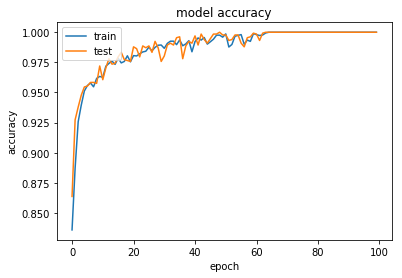

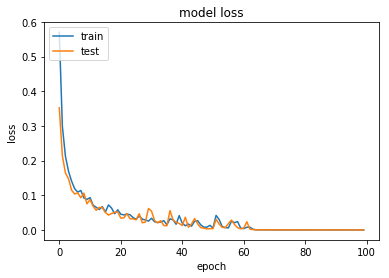

In [99]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Final performance 
1.Validtion Data accuracy
2.Loss
3.Precision
4.Recall
5.F1-Score

In [100]:
score=model.evaluate(x_test,y_test)                                #Score of test Data

1320/1320 [==============================] - 0s 107us/step


In [101]:
print("Test loss:", score[0])
print("Test accuracy:",score[1])

Test loss: 9.014495613042306e-06
Test accuracy: 1.0


In [103]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1320/1320 [==============================] - 0s 26us/step
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1120
           1       0.00      0.00      0.00       200

   micro avg       0.85      0.85      0.85      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.72      0.85      0.78      1320



# Saving Model

In [104]:
model.save_weights("final_model.h5")
print("Saved model to disk")

Saved model to disk
